# Project 1 - Iowa Liquor 

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and wants a report of current liquor sales by county and projections for the rest of the year. 

Your task is as follows:

* Calculate the yearly liquor sales for each store using the provided data. You can add up the transactions for each year, and store sales in 2015 specifically will be used later as your target variable.
* Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of all stores. You must use the sales from Jan to March as one of your variables.
* Use your model for 2015 to estimate total sales in 2016, extrapolating from the sales so far for Jan-March of 2016.
* Report your findings, including any projected increase or decrease in total sales (over the entire state) for the tax committee of the Iowa legislature.
* Use cross-validation to check how your model predicts to held out data compared to the model metrics on the full dataset.
* Fit your model(s) using one or both of the regularization tactics covered. Explain whether the regularized or the non-regularized model performed better and what the selected regression(s) are doing.



# Part 1

### Data Cleaning and EDA

In Part 1 of this two-part project, you will apply the skills you have learned manipulating data in Python with Pandas, Numpy, Matplotlib, Seaborn and other tools to import the Iowa Liquor data, clean the dataset, then perform exploratory analysis using visual and statistical methods.

### Requirements:

**Identify the problem**
- Write a high quality problem statement
- Describe the goals of your study and criteria for success

**Acquire and clean the data**
- Verify the dataset is in the 'Assets' folder of this project - the data is from [Iowa.gov](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), filtered and
reduced
- Import data using the Pandas Library
- Format, clean, slice, and combine the data in Python

**Explore the data**
- Perform exploratory analysis methods with visualization and statistical analysis
- Determine outliers, skew distribution of important variables (if any)
- Determine correlations / causations in the data
- State the risks and assumptions of your data
- Identify 5 relationships, trends, or other intersting attributes of the data set

# Identify the Problem

The goal of this two-part project is to build a model predicting future sales. Write a problem statement and identify SMART goals 

### Problem Statement

To effectively determine what if any changes should be made to the Iowa liquor tax rates, an accurate prediction of the total 2016 Iowa liquor store sales is needed, but only data from January 2015 through March 2016 is available.

### SMART Goals

Develop a model for predicting Iowa's total 2016 liquor store sales within 5% of the actual amount based on liquor store sales data from January through March of 2016. The model will be developed and calibrated using 2015 sales data for all Iowa liquor stores.

# Download Data



If you navigate to the [data.iowa.gov](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) page for the liquor sales data and click "download" - you'll end up with a 3.4GB/12.6 million row file containing all transactions by product for every class-E liquor store in the state since January 1, 2012

For this project, we are providing a trimmed version of this dataset which contains a sample of the data. If you would like to try using a larger sample of the data, reach out to John or Joseph


** The folowing code verifies that the dataset is in the right location **

If the code below returns 'false' - reach out to your instructors.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['font.size'] = 14

os.path.isfile('../Assets/Iowa_Liquor_sample.csv') 

True

In [2]:
# liquor=pd.read_csv('../Assets/Iowa_Liquor_sample.csv')

In [3]:
# liquor['State Bottle Cost'] = liquor['State Bottle Cost'].apply(lambda x: x.replace('$',''))
# liquor['State Bottle Retail'] = liquor['State Bottle Retail'].apply(lambda x: x.replace('$',''))
# liquor['Sale (Dollars)'] = liquor['Sale (Dollars)'].apply(lambda x: x.replace('$',''))

# liquor['State Bottle Cost'] = pd.to_numeric(liquor['State Bottle Cost'],errors='coerce')
# liquor['State Bottle Retail'] = pd.to_numeric(liquor['State Bottle Retail'],errors='coerce')
# liquor['Sale (Dollars)'] = pd.to_numeric(liquor['Sale (Dollars)'],errors='coerce')

# Load Data and Clean

Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [4]:
# import pandas as pd

## Load the data into a DataFrame
# liquor = pd.read_csv('../Assets/Iowa_Liquor_sample.csv')


### Explore the head and tail

View the head and tail of the data set; take a look at the columns. 

Can you identify what each of the columns are describing? 

How many rows / columns are there in the dataset?

In [5]:
# liquor.head()

In [6]:
# liquor.tail()

In [7]:
# liquor.shape

### Parse dates

Using '.dtypes' on our dataframe allows us to view the data type of each of our collumns. Pandas does its best to infer data types on ingest, but we may still need to make assumptions. [Pandas Dtype Basics](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [8]:
# use .dtypes on the liquor dataframe to view the data type of each column
# liquor.dtypes

Note that the 'Date' column has the dtype 'object' - this is the pandas data type designation for a string or a data type it doesn't recognise. 

We want our 'Date' column to be interpreted as datatime by pandas so we can perform time-based grouping and other functions on this column, so we have to convert it to a datetime datatype.

Pandas gives us some options:
- Adjust our pd.read_csv to infer datetimes on import
- Directly convert the date column

[Pandas pd.read_csv datetime handling documentation](https://pandas.pydata.org/pandas-docs/stable/io.html#datetime-handling)

[Pandas pd.to_datetime documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [9]:
# Option 1: adjust pd.read_csv
liquor = pd.read_csv('../Assets/Iowa_Liquor_sample.csv',parse_dates=['Date'],infer_datetime_format=True)


In [10]:
# Option 2: convert the 'Date' column
# liquor["Date"] = pd.to_datetime(df["Date"],errors='coerce',infer_datetime_format=True)


In [11]:
# check .dtypes agin
# liquor.dtypes

### Clean Column Names

Are there spaces in the column names? When columns have spaces in there name, it makes it difficult to use pandas in the form of df.column.method() (ie, liquor.City.value_counts)

For a multi-word column name, you would have to use df['Zip Code'] instead of df.ZipCode

Additionally, some of our columns have parantheses in their names. 

We can remove spaces and special characters from our columns, which will help keep our code clean.

In [12]:
# view  column names
# liquor.columns.values

In [13]:
# remove spaces
liquor.columns = liquor.columns.str.replace(' ','')

In [14]:
# remove both left and right parentheses
liquor.columns = liquor.columns.str.replace('(','')
liquor.columns = liquor.columns.str.replace(')','')

### Clean Numerics

Look at the .dtypes and the .head() of the dataframe again - are there any columns that should be a numeric data type (float, int, etc) that are still objects? (hint - follow the $money)

[Pandas Series.replace()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.replace.html)

[Pandas pd.to_numeric()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html)

In [15]:
# remove characters from a series of strings/objects
# df['column'] = df['column'].replace(...)
liquor['StateBottleCost'] = liquor['StateBottleCost'].apply(lambda x: x.replace('$',''))
liquor['StateBottleRetail'] = liquor['StateBottleRetail'].apply(lambda x: x.replace('$',''))
liquor['SaleDollars'] = liquor['SaleDollars'].apply(lambda x: x.replace('$',''))

In [16]:
# convert string/object columns to numeric
# df['column'] = pd.to_numeric(df['column'], errors='coerce')
liquor['StateBottleCost'] = pd.to_numeric(liquor['StateBottleCost'], errors='coerce')
liquor['StateBottleRetail'] = pd.to_numeric(liquor['StateBottleRetail'], errors='coerce')
liquor['SaleDollars'] = pd.to_numeric(liquor['SaleDollars'], errors='coerce')

In [17]:
# examine your .dtypes and .head() to confirm your type adjustements
liquor.dtypes

Date                 datetime64[ns]
StoreNumber                   int64
City                         object
ZipCode                      object
CountyNumber                float64
County                       object
Category                    float64
CategoryName                 object
VendorNumber                  int64
ItemNumber                    int64
ItemDescription              object
BottleVolumeml                int64
StateBottleCost             float64
StateBottleRetail           float64
BottlesSold                   int64
SaleDollars                 float64
VolumeSoldLiters            float64
VolumeSoldGallons           float64
dtype: object

In [18]:
liquor.shape[0]

270955

In [19]:
liquor.head()

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


### Null Values

Evaluate the null values in the dataset. 

Questions to guide your process:
- What columns have null values?
- How many nulls values are in each column?
- Will the missing values effect your analysis? 
- Can you afford to remove (drop) the null values from your dataset?

[df.isnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html)

[df.dropna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

[O'Reilly article on dealing with nulls using pandas](https://www.oreilly.com/learning/handling-missing-data)

[Data School video on missing values in pandas](https://www.youtube.com/watch?v=fCMrO_VzeL8)

In [20]:
liquor.isnull().sum()

Date                    0
StoreNumber             0
City                    0
ZipCode                 0
CountyNumber         1077
County               1077
Category               68
CategoryName          632
VendorNumber            0
ItemNumber              0
ItemDescription         0
BottleVolumeml          0
StateBottleCost         0
StateBottleRetail       0
BottlesSold             0
SaleDollars             0
VolumeSoldLiters        0
VolumeSoldGallons       0
dtype: int64

In [21]:
print 100*liquor.SaleDollars[liquor.CountyNumber.isnull()].sum()/liquor.SaleDollars.sum()
print 100*liquor.SaleDollars[liquor.County.isnull()].sum()/liquor.SaleDollars.sum()
print 100*liquor.SaleDollars[liquor.Category.isnull()].sum()/liquor.SaleDollars.sum()
print 100*liquor.SaleDollars[liquor.CategoryName.isnull()].sum()/liquor.SaleDollars.sum()
print liquor.SaleDollars.sum()

0.3345106647
0.3345106647
0.0394824104261
0.355355179204
34926742.95


In [56]:
liquor.CountyNumber.fillna(0.0,inplace=True)
liquor.County.fillna('UNAVAILABLE',inplace=True)
liquor.Category.fillna(1000000.0,inplace=True)
liquor.CategoryName.fillna('UNASSIGNED',inplace=True)

In [55]:
# CountyNumber > NaN : 0.0
# County > NaN : 'UNAVAILABLE'
# Category > NaN : 1000000.0
# CategoryName > NaN : 'UNASSIGNED'
# The stuff below would be the starting point of assigning categories and category names based on Item Descriptions, but
# they represent a small 

In [33]:
# liquor[liquor.CountyNumber.isnull() | liquor.County.isnull() | liquor.Category.isnull() | liquor.CategoryName.isnull()]

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
135,2016-01-20,5222,CEDAR RAPIDS,52402,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,Paul Masson Grande Amber Brandy,375,3.22,4.83,24,115.92,9.00,2.38
198,2016-03-02,3820,SIOUX CITY,51103,NaN,NaN,1032080.0,IMPORTED VODKA,35,34359,Grey Goose Vodka,200,5.00,7.50,12,90.00,2.40,0.63
272,2016-03-21,4222,EVANSDALE,50707,NaN,NaN,1062300.0,FLAVORED RUM,370,42716,Malibu Coconut Rum,750,7.49,11.24,3,33.72,2.25,0.59
290,2016-03-21,5236,ANAMOSA,52205,NaN,NaN,1081600.0,WHISKEY LIQUEUR,421,64868,Fireball Cinnamon Whiskey,1750,15.33,23.00,6,138.00,10.50,2.77
321,2016-02-23,4203,WAVERLY,50677,NaN,NaN,1051100.0,APRICOT BRANDIES,434,55084,Paramount Blackberry Brandy,375,3.55,5.33,24,127.92,9.00,2.38
863,2016-01-11,2460,HAMPTON,50441,NaN,NaN,1011200.0,STRAIGHT BOURBON WHISKIES,461,77776,Wild Turkey American Honey,750,10.50,15.75,3,47.25,2.25,0.59
896,2015-02-05,4829,DES MOINES,50314,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,6,212.22,4.50,1.19
901,2016-02-25,4647,WATERLOO,50707,7.0,Black Hawk,1052100.0,NaN,420,48099,Hennessy VS,200,5.74,8.61,24,206.64,4.80,1.27
964,2015-05-19,4247,BELMOND,50421,NaN,NaN,1012100.0,CANADIAN WHISKIES,55,12408,Canadian Ltd Whisky,1750,9.14,13.71,6,82.26,10.50,2.77
982,2016-03-30,5222,CEDAR RAPIDS,52402,NaN,NaN,1031080.0,VODKA 80 PROOF,300,36904,Mccormick Vodka Pet,375,1.80,2.70,24,64.80,9.00,2.38


In [35]:
# liquor.ItemDescription[liquor.Category.isnull()].unique()

array(['Jack Daniels TN Honey & Jack Daniels TN Fire 750mls w/2Gls',
       'Evan Williams Egg Nog', 'Grey Goose w/2 Martini Glasses',
       'Disaronno Amaretto Cavalli Mignon 3-50ml Pack',
       'Bombay Sapphire w/Glass', 'Pinnacle Candy Cane Trial Pack',
       'Wild Turkey American Honey Shot Tap',
       'Woodford Reserve MC 1838 White Corn',
       'Rothman & Winter Orchard Peach', 'Templeton Rye w/Flask',
       'Glenfiddich 1963 Replica HA', 'Gentleman Jack w/2 Glasses',
       'Parkers Heritage Collection Malt Whiskey HA',
       'Knob Creek w/ Crystal Decanter', 'Crystal Head Aurora Vodka',
       'Southern Comfort w/Shot Glass & Lanyard'], dtype=object)

In [52]:
# liquor.ItemDescription[liquor.CategoryName.isnull()].unique()

array(['Herradura Gold Reposado 6pak', 'Hennessy VS',
       'Grand Marnier Raspberry Peach', 'Hennessy Vs Cognac',
       'Svedka Vodka', 'Disaronno Amaretto',
       "Tim Smith's Climax Moonshine",
       'Jack Daniels TN Honey & Jack Daniels TN Fire 750mls w/2Gls',
       'Captain Morgan Coconut', 'Evan Williams Egg Nog',
       'Grand Marnier Cordon Rouge', 'Ole Smoky Cherry Moonshine',
       "Dr. McGillicuddy's Peach Mini", 'Galliano Liqueur',
       'Grey Goose w/2 Martini Glasses', 'Exotico Blanco',
       'Disaronno Amaretto Cavalli Mignon 3-50ml Pack', '1800 Silver',
       'Hennessy Black', 'Hennessy Vs Cognac 100ml',
       'Captain Morgan Grapefruit', 'Tres Generaciones Anejo',
       'Stolichnaya Premium Vodka 80 Proof (lv)',
       'Bombay Sapphire w/Glass', 'Three Olives Cake Flavored Vodka',
       'Captain Morgan Pineapple', "Gosling's Black Seal",
       'Blue Chair Bay Coconut', 'Licor 43', 'Rondiaz Rum Spiced',
       'Stolichnaya Premium Vodka 80 Prf', 'Olmeca Alt

In [51]:
# liquor.CategoryName.unique()

array(['APRICOT BRANDIES', 'BLENDED WHISKIES', 'STRAIGHT BOURBON WHISKIES',
       'AMERICAN COCKTAILS', 'VODKA 80 PROOF', 'AMERICAN DRY GINS',
       'AMERICAN GRAPE BRANDIES', 'CANADIAN WHISKIES', 'IMPORTED VODKA',
       'CINNAMON SCHNAPPS', 'SINGLE BARREL BOURBON WHISKIES',
       'PEPPERMINT SCHNAPPS', 'VODKA FLAVORED', '100 PROOF VODKA',
       'DISTILLED SPIRITS SPECIALTY', 'TEQUILA', 'TENNESSEE WHISKIES',
       'WHISKEY LIQUEUR', 'MISC. AMERICAN CORDIALS & LIQUEURS',
       'APPLE SCHNAPPS', 'CHERRY BRANDIES',
       'MISC. IMPORTED CORDIALS & LIQUEURS', 'IMPORTED DRY GINS',
       'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES', 'SINGLE MALT SCOTCH',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'SPICED RUM', 'CREAM LIQUEURS',
       'SCOTCH WHISKIES', 'IMPORTED VODKA - MISC', 'IRISH WHISKIES',
       'FLAVORED RUM', 'IMPORTED GRAPE BRANDIES', 'SPEARMINT SCHNAPPS',
       'RASPBERRY SCHNAPPS', 'TRIPLE SEC', 'AMERICAN AMARETTO',
       'IMPORTED SCHNAPPS', 'STRAIGHT RYE WHISKIES', '

In [40]:
# liquor[liquor.CategoryName.isnull()]

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
896,2015-02-05,4829,DES MOINES,50314,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,6,212.22,4.50,1.19
901,2016-02-25,4647,WATERLOO,50707,7.0,Black Hawk,1052100.0,NaN,420,48099,Hennessy VS,200,5.74,8.61,24,206.64,4.80,1.27
1514,2016-02-18,2515,MASON CITY,50401,17.0,Cerro Gordo,1082100.0,NaN,420,67487,Grand Marnier Raspberry Peach,750,23.31,34.97,2,69.94,1.50,0.40
1684,2016-02-08,3747,SIGOURNEY,52591,54.0,Keokuk,1052100.0,NaN,420,48106,Hennessy Vs Cognac,750,18.99,28.49,2,56.98,1.50,0.40
2203,2016-02-16,4589,SIBLEY,51249,72.0,Osceola,1032100.0,NaN,115,34821,Svedka Vodka,1750,14.74,22.11,2,44.22,3.50,0.92
2894,2016-02-09,2413,DUBUQUE,52001,31.0,Dubuque,1082100.0,NaN,130,64136,Disaronno Amaretto,750,13.86,20.79,12,249.48,9.00,2.38
3071,2016-02-15,2539,IOWA FALLS,50126,42.0,Hardin,1052100.0,NaN,420,48106,Hennessy Vs Cognac,750,18.99,28.49,3,85.47,2.25,0.59
3482,2016-02-10,3524,AMES,50010,85.0,Story,1032100.0,NaN,115,34821,Svedka Vodka,1750,14.74,22.11,6,132.66,10.50,2.77
4596,2016-02-03,2594,SIOUX CITY,51106,97.0,Woodbury,1052100.0,NaN,420,48099,Hennessy VS,200,5.74,8.61,1,8.61,0.20,0.05
4989,2016-02-23,2620,WINDSOR HEIGHTS,50311,77.0,Polk,1091100.0,NaN,208,27439,Tim Smith's Climax Moonshine,750,17.50,26.25,6,157.50,4.50,1.19


In [42]:
# liquor.Category[liquor.CategoryName.isnull()].unique()

array([ 1022200.,  1052100.,  1082100.,  1032100.,  1091100.,       nan,
        1062500.,  1091300.,  1082200.,  1062400.,  1011700.,  1092100.])

In [43]:
# liquor[liquor.Category.isin(liquor.Category[liquor.CategoryName.isnull()].unique())]

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
896,2015-02-05,4829,DES MOINES,50314,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,6,212.22,4.50,1.19
901,2016-02-25,4647,WATERLOO,50707,7.0,Black Hawk,1052100.0,NaN,420,48099,Hennessy VS,200,5.74,8.61,24,206.64,4.80,1.27
1514,2016-02-18,2515,MASON CITY,50401,17.0,Cerro Gordo,1082100.0,NaN,420,67487,Grand Marnier Raspberry Peach,750,23.31,34.97,2,69.94,1.50,0.40
1684,2016-02-08,3747,SIGOURNEY,52591,54.0,Keokuk,1052100.0,NaN,420,48106,Hennessy Vs Cognac,750,18.99,28.49,2,56.98,1.50,0.40
2203,2016-02-16,4589,SIBLEY,51249,72.0,Osceola,1032100.0,NaN,115,34821,Svedka Vodka,1750,14.74,22.11,2,44.22,3.50,0.92
2894,2016-02-09,2413,DUBUQUE,52001,31.0,Dubuque,1082100.0,NaN,130,64136,Disaronno Amaretto,750,13.86,20.79,12,249.48,9.00,2.38
3071,2016-02-15,2539,IOWA FALLS,50126,42.0,Hardin,1052100.0,NaN,420,48106,Hennessy Vs Cognac,750,18.99,28.49,3,85.47,2.25,0.59
3482,2016-02-10,3524,AMES,50010,85.0,Story,1032100.0,NaN,115,34821,Svedka Vodka,1750,14.74,22.11,6,132.66,10.50,2.77
4596,2016-02-03,2594,SIOUX CITY,51106,97.0,Woodbury,1052100.0,NaN,420,48099,Hennessy VS,200,5.74,8.61,1,8.61,0.20,0.05
4989,2016-02-23,2620,WINDSOR HEIGHTS,50311,77.0,Polk,1091100.0,NaN,208,27439,Tim Smith's Climax Moonshine,750,17.50,26.25,6,157.50,4.50,1.19


## Exploratory Data Analysis

Using pandas (and other tools such as NumPy, Matplotlib, or Seaborn) explore the Iowa Liquor dataset.

**Remember** Your goal in Part 2 will be to predict future sales. Look for relationships, trends, and features that may assist you in that task.

### Identify 5 trends, relationships, or things that stand out to you in the dataset

Display yout findings below

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Some questions to get you started:

 - What categories had the highest number of sales?
 - What categories had the highest sales in dollars?
 - Are there any strong relationships between any of the features and sales (in dollars)?
 - Are there any outliers? Are there any individual sales, stores, locations, or categories that show strange behavior?
 - What categories are the most profitable?
 - What stores are the most profitable?
 
 


** Example ** 

Relationship between mean Bottles Sold and average SaleDollars (by store)

There is a strong possitive relationship between the average number of bottles sold per transaction at a store and the average total sale amount per transaction at the same store. 

Digging deeper, by comparing BottlesSold to StateBottleRetai we can see that there is almost no relationship between the average bottle price per transaction at a store and the average number of bottles sold per transaction; that is stores which are selling more bottles per transaction are not nescesarily selling cheaper items, and stores that are selling less bottles are not selling more expensive items.


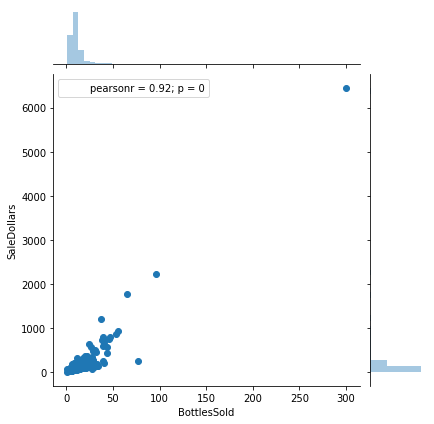

In [58]:
# graphing relationship between mean Bottles Sold per store and mean Sale total per store
# seaborn's jointplot provides a scatter of my variables, histograms, and a pearson correlation coefficient

liquor_grouped_mean = liquor.groupby('StoreNumber').mean()

sns.jointplot(x='BottlesSold',y='SaleDollars',data=liquor_grouped_mean)
plt.show()

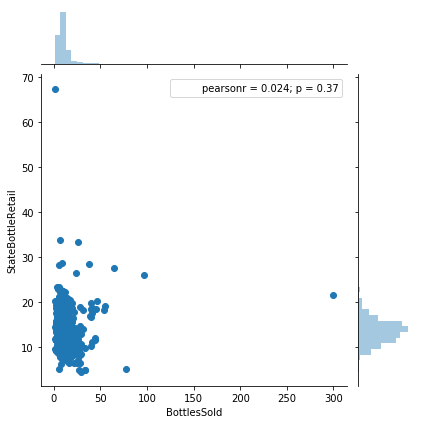

In [59]:
# graphing relationship between mean Bottles Sold per store and mean Bottle Retail price per store
sns.jointplot(x='BottlesSold',y='StateBottleRetail',data=liquor_grouped_mean)
plt.show()

In [60]:
# histogram of average bottle retail price
liquor_grouped_mean[liquor_grouped_mean.StateBottleRetail <= 50].StateBottleRetail.plot(kind='hist')

liquor_grouped_mean.StateBottleRetail.describe()

count    1400.000000
mean       13.638091
std         3.314978
min         4.515000
25%        11.663636
50%        13.551636
75%        15.225041
max        67.490000
Name: StateBottleRetail, dtype: float64

### Finding #1

Sales are highest in Q1 and relatively stable at lower levels throughout the rest of the year with a slight uptick in Q4.
Sales are concentrated on Mondays through Thursdays. 

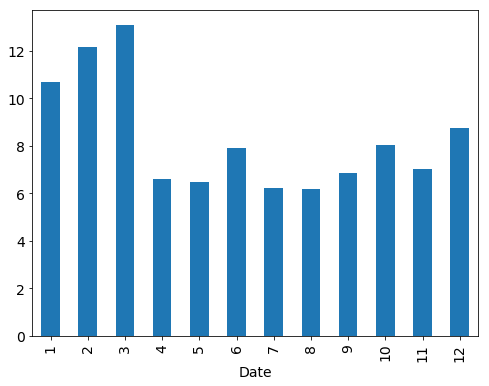

In [81]:
# Plot % of Annual Sales per Month
(100*liquor.SaleDollars.groupby(liquor.Date.dt.month).sum()/liquor.SaleDollars.sum()).plot(kind='bar')

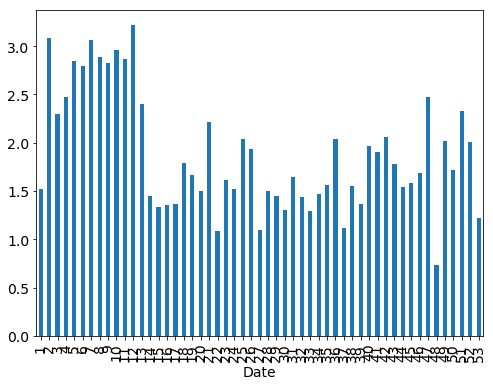

In [83]:
# Plot % of Annual Sales per Week of year
(100*liquor.SaleDollars.groupby(liquor.Date.dt.weekofyear).sum()/liquor.SaleDollars.sum()).plot(kind='bar')

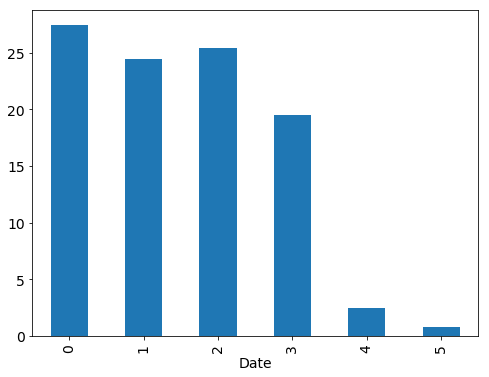

In [84]:
# Plot % of Annual Sales per Day of Week
(100*liquor.SaleDollars.groupby(liquor.Date.dt.dayofweek).sum()/liquor.SaleDollars.sum()).plot(kind='bar')

### Finding #2

No obviously strong correlations to SaleDollars when correlations between the raw data is reviewed, so I shifted my focus to correlations with the counties and categories that contributed the most to total sales.

Of the counties with the highest sales, Pottawattamie's are the most highly correlated to total monthly SalesDollars. Some other counties also have high correlations.

Among the larger counties, Johnson and Story counties are relatively poorly correlated to SalesDollars, yet are each other's most highly correlated county. Those two counties host the two largest universities in the state, so I believe that helps explain this finding.

In [86]:
# your code here
liquor.corr()

,StoreNumber,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
StoreNumber,1.000000,0.001798,-0.012075,-0.004533,-0.026386,-0.063475,-0.071382,-0.071520,0.014422,-0.017941,-0.017696,-0.017686
CountyNumber,0.001798,1.000000,-0.006477,0.001823,0.006865,-0.027294,0.012297,0.012232,0.019047,0.020114,0.010635,0.010643
Category,-0.012075,-0.006477,1.000000,0.092027,0.116128,-0.009364,-0.013551,-0.013737,-0.000218,0.006339,-0.004376,-0.004368
VendorNumber,-0.004533,0.001823,0.092027,1.000000,0.136120,0.024561,0.003477,0.003085,-0.002116,-0.012277,-0.007432,-0.007428
ItemNumber,-0.026386,0.006865,0.116128,0.136120,1.000000,-0.057282,0.097879,0.097612,-0.004766,0.002987,-0.009555,-0.009545
BottleVolumeml,-0.063475,-0.027294,-0.009364,0.024561,-0.057282,1.000000,0.312841,0.313819,-0.012476,0.082446,0.156258,0.156090
StateBottleCost,-0.071382,0.012297,-0.013551,0.003477,0.097879,0.312841,1.000000,0.999960,-0.062980,0.135931,0.009296,0.009264
StateBottleRetail,-0.071520,0.012232,-0.013737,0.003085,0.097612,0.313819,0.999960,1.000000,-0.062831,0.136114,0.009736,0.009705
BottlesSold,0.014422,0.019047,-0.000218,-0.002116,-0.004766,-0.012476,-0.062980,-0.062831,1.000000,0.825446,0.883348,0.883378
SaleDollars,-0.017941,0.020114,0.006339,-0.012277,0.002987,0.082446,0.135931,0.136114,0.825446,1.000000,0.846420,0.846432


In [238]:
two_third_count_monthly_total = ['Polk','Linn','Scott','Johnson','Black Hawk','Pottawattamie','Woodbury',\
                                 'Dubuque','Story','Cerro Gordo','SalesDollars']
two_third_count_df_monthly_total = pd.DataFrame(columns=two_third_count_monthly_total)

In [239]:
for x in two_third_count_monthly_total:
    two_third_count_df_monthly_total[x] = liquor.SaleDollars[liquor.County.isin([x])].groupby(liquor[liquor.County.isin([x])].Date.dt.month).sum()

two_third_count_df_monthly_total['SalesDollars'] = liquor.SaleDollars.groupby(liquor.Date.dt.month).sum()


In [240]:
two_third_count_df_monthly_total.corr()

,Polk,Linn,Scott,Johnson,Black Hawk,Pottawattamie,Woodbury,Dubuque,Story,Cerro Gordo,SalesDollars
Polk,1.000000,0.862771,0.845969,0.741515,0.959779,0.927901,0.856150,0.890865,0.768414,0.784110,0.952519
Linn,0.862771,1.000000,0.923506,0.879576,0.872285,0.949731,0.952187,0.956163,0.797748,0.675025,0.953188
Scott,0.845969,0.923506,1.000000,0.861394,0.874096,0.903513,0.949601,0.939627,0.778307,0.807245,0.945623
Johnson,0.741515,0.879576,0.861394,1.000000,0.766013,0.774124,0.883473,0.798577,0.891930,0.558635,0.856162
Black Hawk,0.959779,0.872285,0.874096,0.766013,1.000000,0.911572,0.894838,0.874769,0.802161,0.845353,0.964378
Pottawattamie,0.927901,0.949731,0.903513,0.774124,0.911572,1.000000,0.935509,0.957267,0.744902,0.768993,0.966738
Woodbury,0.856150,0.952187,0.949601,0.883473,0.894838,0.935509,1.000000,0.928164,0.859236,0.762653,0.960134
Dubuque,0.890865,0.956163,0.939627,0.798577,0.874769,0.957267,0.928164,1.000000,0.768065,0.724011,0.949097
Story,0.768414,0.797748,0.778307,0.891930,0.802161,0.744902,0.859236,0.768065,1.000000,0.658018,0.842291
Cerro Gordo,0.784110,0.675025,0.807245,0.558635,0.845353,0.768993,0.762653,0.724011,0.658018,1.000000,0.818343


### Finding #2

Polk county represents ~1/4 of total sales with the top 5 counties comprising 1/2 of total sales and the top 10 counties comprising 2/3 of total sales.

Polk is a significant driver of the small October sales spike.

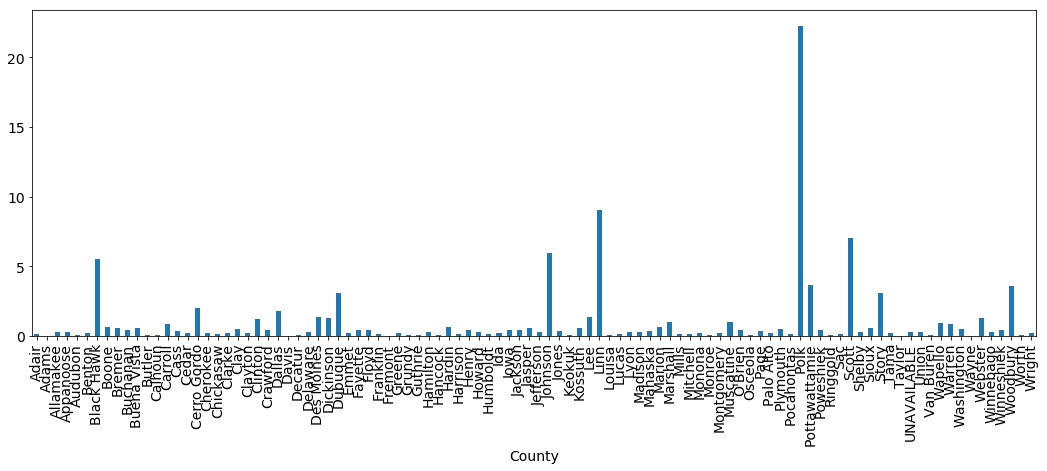

In [91]:
# your code here
(100*liquor.SaleDollars.groupby(liquor.County).sum()/liquor.SaleDollars.sum()).plot(kind='bar')


In [219]:
print 'top 5 counties are this % of total sales  '+str((100*liquor.SaleDollars.groupby(liquor.County).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(5).sum())
print 'top 10 counties are this % of total sales  '+str((100*liquor.SaleDollars.groupby(liquor.County).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(10).sum())
print 'top 15 counties are this % of total sales  '+str((100*liquor.SaleDollars.groupby(liquor.County).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(15).sum())
print 'top 20 counties are this % of total sales  '+str((100*liquor.SaleDollars.groupby(liquor.County).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(20).sum())
print 'top 25 counties are this % of total sales  '+str((100*liquor.SaleDollars.groupby(liquor.County).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(25).sum())
print 'top 30 counties are this % of total sales  '+str((100*liquor.SaleDollars.groupby(liquor.County).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(30).sum())

(100*liquor.SaleDollars.groupby(liquor.County).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(10)

top 5 counties are this % of total sales  49.9119184831
top 10 counties are this % of total sales  65.3378701033
top 15 counties are this % of total sales  72.4341271564
top 20 counties are this % of total sales  77.4974247921
top 25 counties are this % of total sales  80.9628911304
top 30 counties are this % of total sales  83.8255343532


County
Polk             22.290534
Linn              9.020105
Scott             7.068290
Johnson           5.987692
Black Hawk        5.545297
Pottawattamie     3.666804
Woodbury          3.587967
Dubuque           3.099504
Story             3.078652
Cerro Gordo       1.993025
Name: SaleDollars, dtype: float64

In [248]:
two_third_count = ['Polk','Linn','Scott','Johnson','Black Hawk','Pottawattamie','Woodbury',\
                                 'Dubuque','Story','Cerro Gordo']
two_third_count_df_self = pd.DataFrame(columns=two_third_count)
two_third_count_df_month = pd.DataFrame(columns=two_third_count)
two_third_count_df_total = pd.DataFrame(columns=two_third_count)


In [249]:
for x in two_third_count:
    two_third_count_df_self[x] = liquor.SaleDollars[liquor.County.isin([x])].groupby(liquor[liquor.County.isin([x])].Date.dt.month).sum()/liquor.SaleDollars[liquor.County.isin([x])].sum()

In [250]:
for x in two_third_count:
    two_third_count_df_month[x] = liquor.SaleDollars[liquor.County.isin([x])].groupby(liquor[liquor.County.isin([x])].Date.dt.month).sum()/liquor.SaleDollars.groupby(liquor.Date.dt.month).sum()

In [251]:
for x in two_third_count:
    two_third_count_df_total[x] = liquor.SaleDollars[liquor.County.isin([x])].groupby(liquor[liquor.County.isin([x])].Date.dt.month).sum()/liquor.SaleDollars.sum()

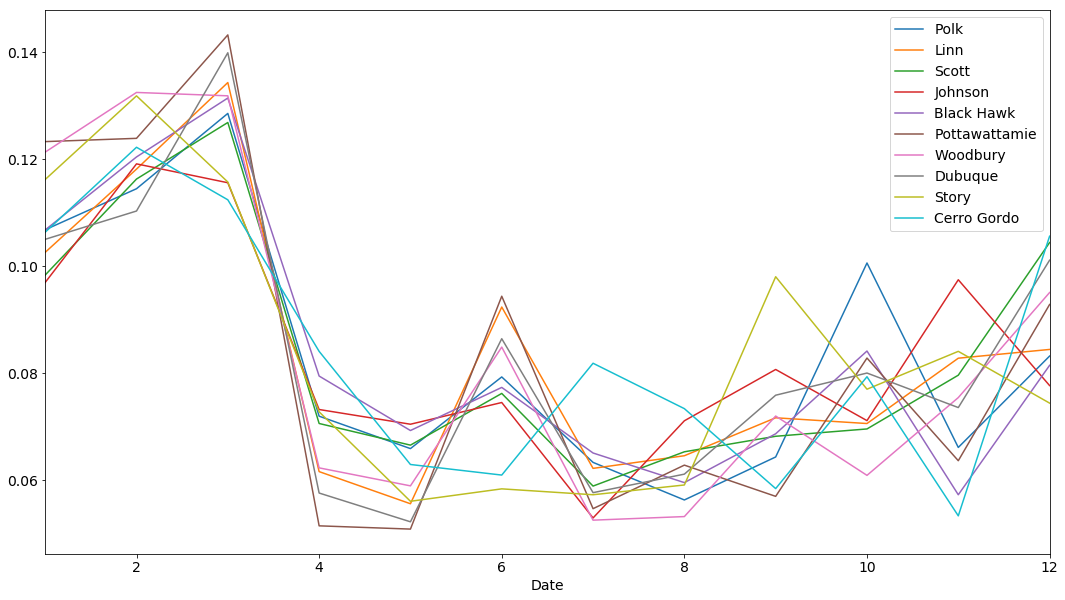

In [252]:
# y axis is the monthly SalesDollars for each of the top 11 categories as a percent of that category's annual SalesDollars
two_third_count_df_self.plot()

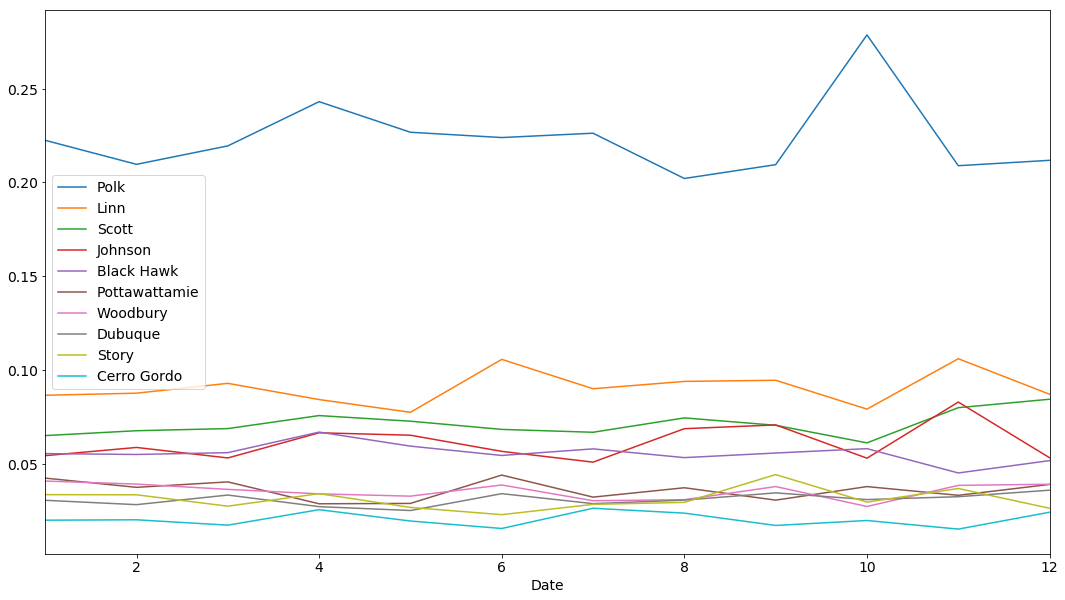

In [253]:
# y axis is the monthly SalesDollars for each of the top 11 categories as a percent of that month's total SalesDollars
two_third_count_df_month.plot()

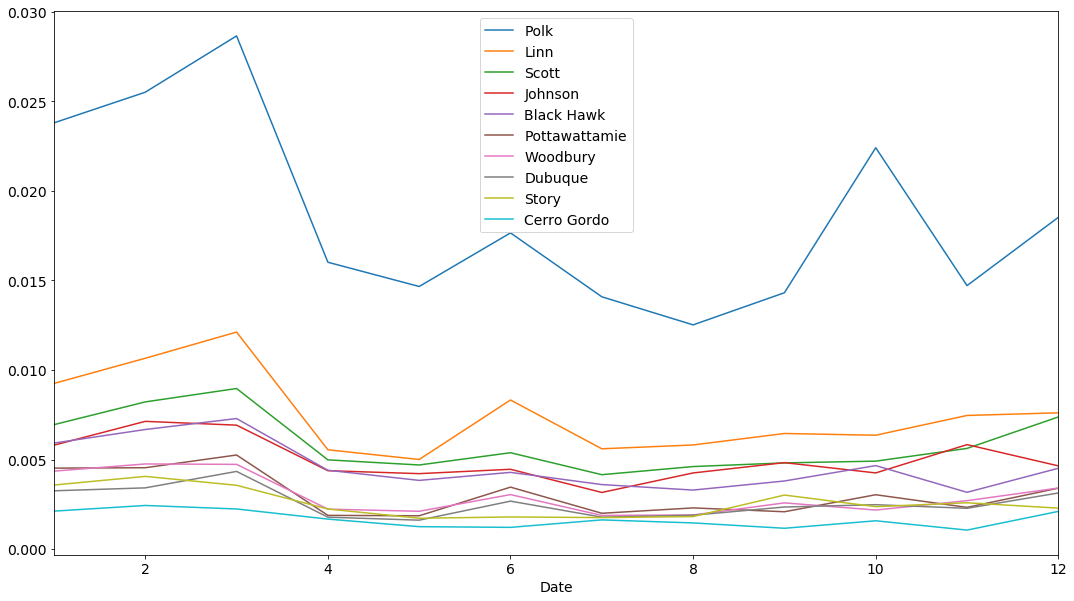

In [254]:
# y axis is the monthly SalesDollars for each of the top 11 categories as a percent of annual SalesDollars
two_third_count_df_total.plot()

### Finding #3

No obviously strong correlations to SaleDollars when correlations between the raw data is reviewed, so I shifted my focus to correlations with the largest counties and common categories that contributed the most to total sales.

Of the counties with the highest sales, Pottawattamie's are the most highly correlated to total monthly SalesDollars. Some other counties also have high correlations.

Among the larger counties, Johnson and Story counties are relatively poorly correlated to SalesDollars, yet are each other's most highly correlated county. Those two counties host the two largest universities in the state, so I believe that helps explain this finding.

In [86]:
# your code here
liquor.corr()

,StoreNumber,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
StoreNumber,1.000000,0.001798,-0.012075,-0.004533,-0.026386,-0.063475,-0.071382,-0.071520,0.014422,-0.017941,-0.017696,-0.017686
CountyNumber,0.001798,1.000000,-0.006477,0.001823,0.006865,-0.027294,0.012297,0.012232,0.019047,0.020114,0.010635,0.010643
Category,-0.012075,-0.006477,1.000000,0.092027,0.116128,-0.009364,-0.013551,-0.013737,-0.000218,0.006339,-0.004376,-0.004368
VendorNumber,-0.004533,0.001823,0.092027,1.000000,0.136120,0.024561,0.003477,0.003085,-0.002116,-0.012277,-0.007432,-0.007428
ItemNumber,-0.026386,0.006865,0.116128,0.136120,1.000000,-0.057282,0.097879,0.097612,-0.004766,0.002987,-0.009555,-0.009545
BottleVolumeml,-0.063475,-0.027294,-0.009364,0.024561,-0.057282,1.000000,0.312841,0.313819,-0.012476,0.082446,0.156258,0.156090
StateBottleCost,-0.071382,0.012297,-0.013551,0.003477,0.097879,0.312841,1.000000,0.999960,-0.062980,0.135931,0.009296,0.009264
StateBottleRetail,-0.071520,0.012232,-0.013737,0.003085,0.097612,0.313819,0.999960,1.000000,-0.062831,0.136114,0.009736,0.009705
BottlesSold,0.014422,0.019047,-0.000218,-0.002116,-0.004766,-0.012476,-0.062980,-0.062831,1.000000,0.825446,0.883348,0.883378
SaleDollars,-0.017941,0.020114,0.006339,-0.012277,0.002987,0.082446,0.135931,0.136114,0.825446,1.000000,0.846420,0.846432


In [238]:
two_third_count_monthly_total = ['Polk','Linn','Scott','Johnson','Black Hawk','Pottawattamie','Woodbury',\
                                 'Dubuque','Story','Cerro Gordo','SalesDollars']
two_third_count_df_monthly_total = pd.DataFrame(columns=two_third_count_monthly_total)

In [239]:
for x in two_third_count_monthly_total:
    two_third_count_df_monthly_total[x] = liquor.SaleDollars[liquor.County.isin([x])].groupby(liquor[liquor.County.isin([x])].Date.dt.month).sum()

two_third_count_df_monthly_total['SalesDollars'] = liquor.SaleDollars.groupby(liquor.Date.dt.month).sum()


In [240]:
two_third_count_df_monthly_total.corr()

,Polk,Linn,Scott,Johnson,Black Hawk,Pottawattamie,Woodbury,Dubuque,Story,Cerro Gordo,SalesDollars
Polk,1.000000,0.862771,0.845969,0.741515,0.959779,0.927901,0.856150,0.890865,0.768414,0.784110,0.952519
Linn,0.862771,1.000000,0.923506,0.879576,0.872285,0.949731,0.952187,0.956163,0.797748,0.675025,0.953188
Scott,0.845969,0.923506,1.000000,0.861394,0.874096,0.903513,0.949601,0.939627,0.778307,0.807245,0.945623
Johnson,0.741515,0.879576,0.861394,1.000000,0.766013,0.774124,0.883473,0.798577,0.891930,0.558635,0.856162
Black Hawk,0.959779,0.872285,0.874096,0.766013,1.000000,0.911572,0.894838,0.874769,0.802161,0.845353,0.964378
Pottawattamie,0.927901,0.949731,0.903513,0.774124,0.911572,1.000000,0.935509,0.957267,0.744902,0.768993,0.966738
Woodbury,0.856150,0.952187,0.949601,0.883473,0.894838,0.935509,1.000000,0.928164,0.859236,0.762653,0.960134
Dubuque,0.890865,0.956163,0.939627,0.798577,0.874769,0.957267,0.928164,1.000000,0.768065,0.724011,0.949097
Story,0.768414,0.797748,0.778307,0.891930,0.802161,0.744902,0.859236,0.768065,1.000000,0.658018,0.842291
Cerro Gordo,0.784110,0.675025,0.807245,0.558635,0.845353,0.768993,0.762653,0.724011,0.658018,1.000000,0.818343


### Finding #4

11 categories represent 2/3 of annual sales, and the top two (CANADIAN WHISKIES and VODKA 80 PROOF) represent 1/4 of annual sales.
CANADIAN WHISKIES in particular seems to play an outsized role in February and October. 
CANADIAN WHISKIES in Polk County play a large role in October sales.


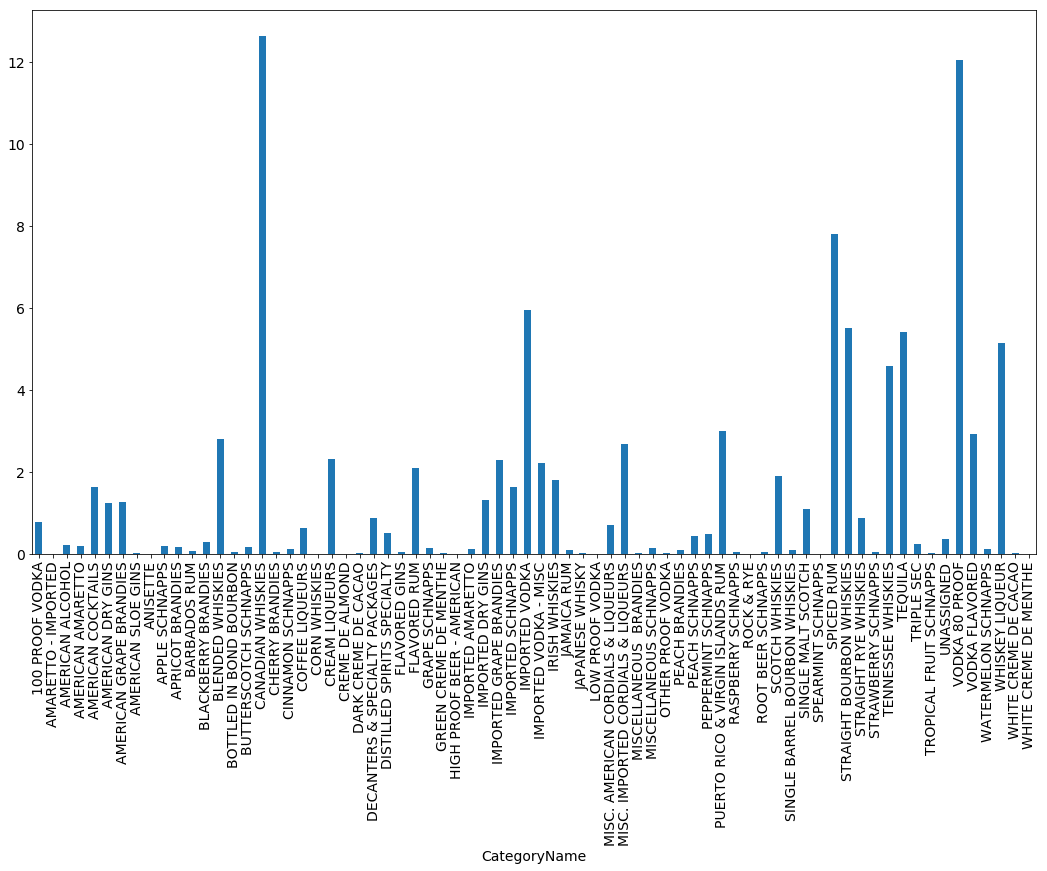

In [220]:
# your code here

(100*liquor.SaleDollars.groupby(liquor.CategoryName).sum()/liquor.SaleDollars.sum()).plot(kind='bar')


In [221]:
print 'top 2 categories are this % of total sales  '+str((100*liquor.SaleDollars.groupby(liquor.CategoryName).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(2).sum())
print 'top 10 categories are this % of total sales  '+str((100*liquor.SaleDollars.groupby(liquor.CategoryName).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(10).sum())
print 'top 15 categories are this % of total sales  '+str((100*liquor.SaleDollars.groupby(liquor.CategoryName).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(15).sum())
print 'top 20 categories are this % of total sales  '+str((100*liquor.SaleDollars.groupby(liquor.CategoryName).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(20).sum())
print 'top 25 categories are this % of total sales  '+str((100*liquor.SaleDollars.groupby(liquor.CategoryName).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(25).sum())
print 'top 30 categories are this % of total sales  '+str((100*liquor.SaleDollars.groupby(liquor.CategoryName).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(30).sum())

(100*liquor.SaleDollars.groupby(liquor.CategoryName).sum()/liquor.SaleDollars.sum()).sort_values(ascending=False).head(30)

top 2 categories are this % of total sales  24.6733005775
top 10 categories are this % of total sales  64.9847494297
top 15 categories are this % of total sales  77.3077376515
top 20 categories are this % of total sales  86.4198692767
top 25 categories are this % of total sales  92.2288758677
top 30 categories are this % of total sales  95.7180690678


CategoryName
CANADIAN WHISKIES                     12.622903
VODKA 80 PROOF                        12.050398
SPICED RUM                             7.809788
IMPORTED VODKA                         5.952489
STRAIGHT BOURBON WHISKIES              5.508409
TEQUILA                                5.401947
WHISKEY LIQUEUR                        5.145208
TENNESSEE WHISKIES                     4.577024
PUERTO RICO & VIRGIN ISLANDS RUM       2.995901
VODKA FLAVORED                         2.920683
BLENDED WHISKIES                       2.801329
MISC. IMPORTED CORDIALS & LIQUEURS     2.695189
CREAM LIQUEURS                         2.312588
IMPORTED GRAPE BRANDIES                2.298037
IMPORTED VODKA - MISC                  2.215845
FLAVORED RUM                           2.109289
SCOTCH WHISKIES                        1.909950
IRISH WHISKIES                         1.815817
IMPORTED SCHNAPPS                      1.640527
AMERICAN COCKTAILS                     1.636548
IMPORTED DRY GINS          

In [222]:
two_third_cats = ['CANADIAN WHISKIES','VODKA 80 PROOF','SPICED RUM','IMPORTED VODKA','STRAIGHT BOURBON WHISKIES','TEQUILA','WHISKEY LIQUEUR',\
 'TENNESSEE WHISKIES','PUERTO RICO & VIRGIN ISLANDS RUM','VODKA FLAVORED','BLENDED WHISKIES']
two_third_cats_df_self = pd.DataFrame(columns=two_third_cats)
two_third_cats_df_month = pd.DataFrame(columns=two_third_cats)
two_third_cats_df_total = pd.DataFrame(columns=two_third_cats)


In [223]:
for x in two_third_cats:
    two_third_cats_df_self[x] = liquor.SaleDollars[liquor.CategoryName.isin([x])].groupby(liquor[liquor.CategoryName.isin([x])].Date.dt.month).sum()/liquor.SaleDollars[liquor.CategoryName.isin([x])].sum()

In [224]:
for x in two_third_cats:
    two_third_cats_df_month[x] = liquor.SaleDollars[liquor.CategoryName.isin([x])].groupby(liquor[liquor.CategoryName.isin([x])].Date.dt.month).sum()/liquor.SaleDollars.groupby(liquor.Date.dt.month).sum()

In [225]:
for x in two_third_cats:
    two_third_cats_df_total[x] = liquor.SaleDollars[liquor.CategoryName.isin([x])].groupby(liquor[liquor.CategoryName.isin([x])].Date.dt.month).sum()/liquor.SaleDollars.sum()

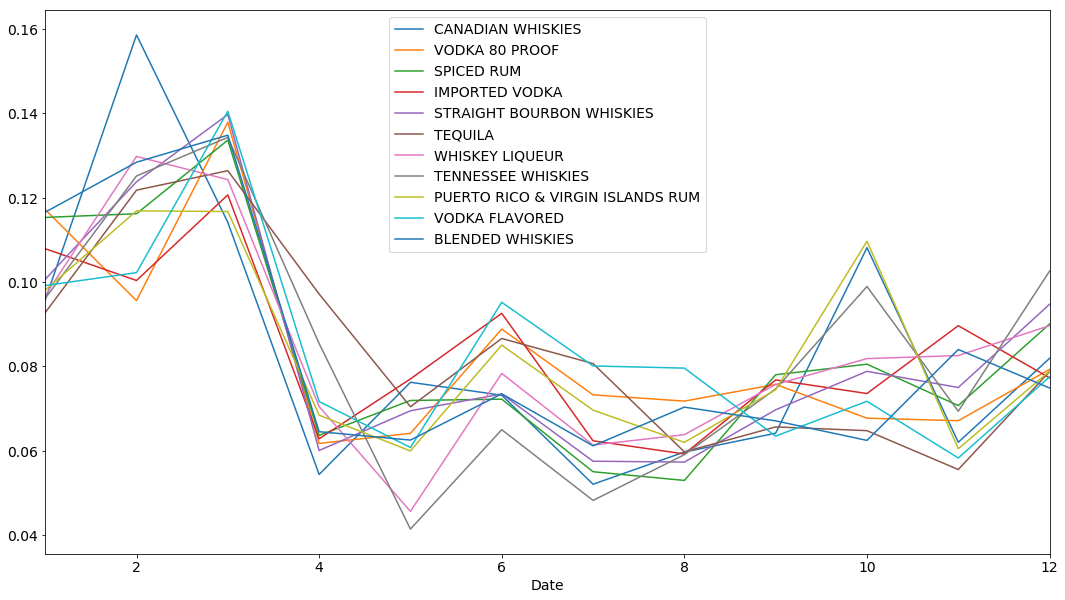

In [226]:
# y axis is the monthly SalesDollars for each of the top 11 categories as a percent of that category's annual SalesDollars
two_third_cats_df_self.plot()

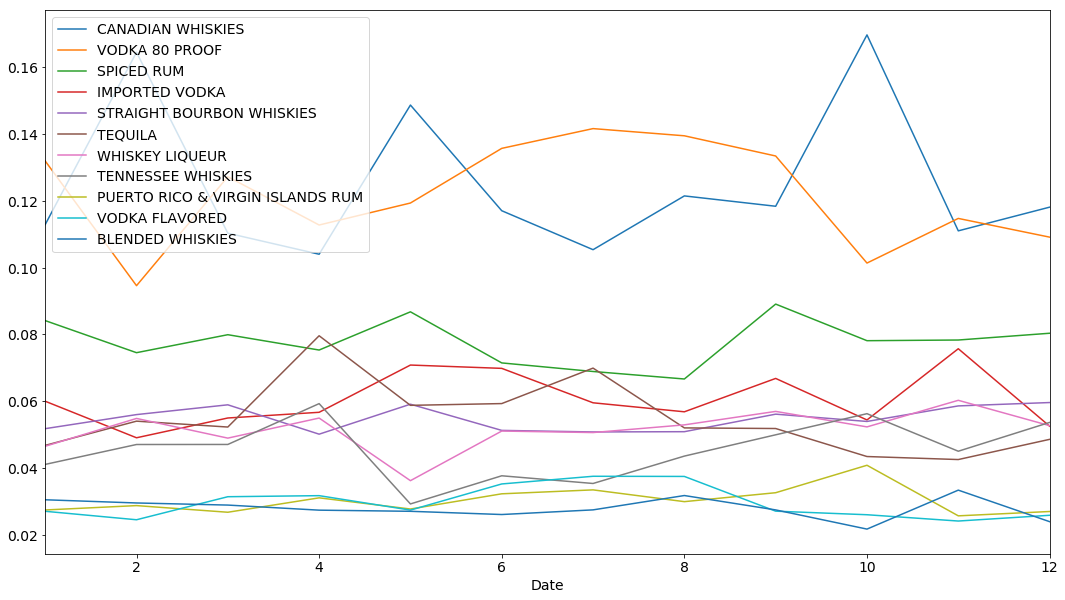

In [227]:
# y axis is the monthly SalesDollars for each of the top 11 categories as a percent of that month's total SalesDollars
two_third_cats_df_month.plot()

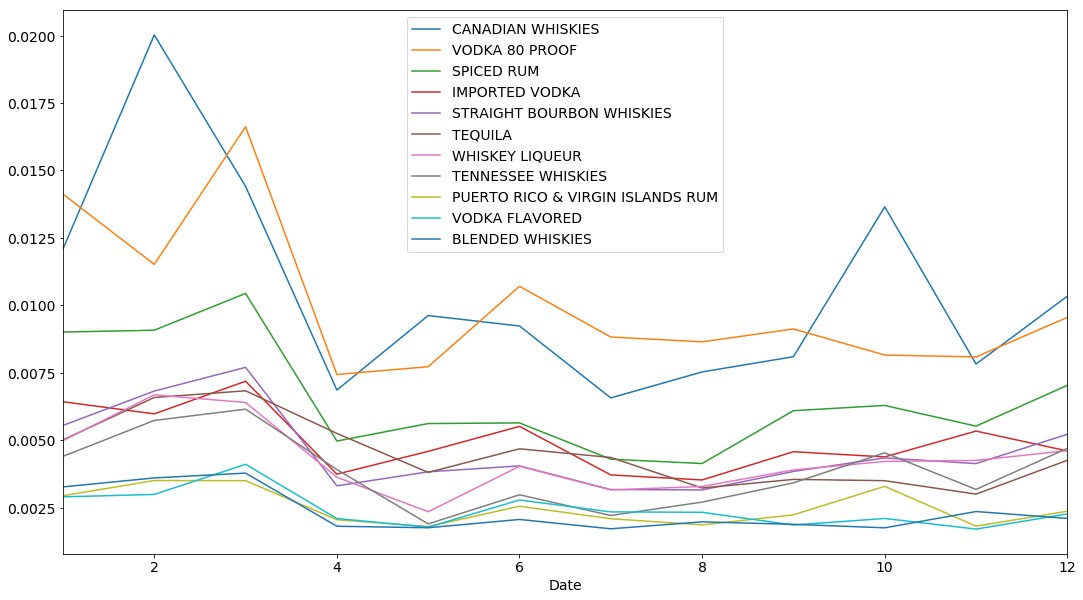

In [228]:
# y axis is the monthly SalesDollars for each of the top 11 categories as a percent of annual SalesDollars
two_third_cats_df_total.plot()

### Finding #5

SPICED RUM and STRAIGHT BOURBON WHISKIES monthly SalesDollars correlates highly to the monthly total sales.
Also, STRAIGHT BOURBON WHISKIES monthly SalesDollars correlates highly to many counties' monthly total sales.


In [229]:
two_third_cats_monthly_total = ['CANADIAN WHISKIES','VODKA 80 PROOF','SPICED RUM','IMPORTED VODKA','STRAIGHT BOURBON WHISKIES','TEQUILA','WHISKEY LIQUEUR',\
 'TENNESSEE WHISKIES','PUERTO RICO & VIRGIN ISLANDS RUM','VODKA FLAVORED','BLENDED WHISKIES','SalesDollars']
two_third_cats_df_monthly_total = pd.DataFrame(columns=two_third_cats)

In [230]:
for x in two_third_cats:
    two_third_cats_df_monthly_total[x] = liquor.SaleDollars[liquor.CategoryName.isin([x])].groupby(liquor[liquor.CategoryName.isin([x])].Date.dt.month).sum()

two_third_cats_df_monthly_total['SalesDollars'] = liquor.SaleDollars.groupby(liquor.Date.dt.month).sum()


In [231]:
two_third_cats_df_monthly_total.corr()

,CANADIAN WHISKIES,VODKA 80 PROOF,SPICED RUM,IMPORTED VODKA,STRAIGHT BOURBON WHISKIES,TEQUILA,WHISKEY LIQUEUR,TENNESSEE WHISKIES,PUERTO RICO & VIRGIN ISLANDS RUM,VODKA FLAVORED,BLENDED WHISKIES,SalesDollars
CANADIAN WHISKIES,1.000000,0.553816,0.802945,0.645247,0.836386,0.647785,0.817777,0.779562,0.879937,0.576936,0.747866,0.850435
VODKA 80 PROOF,0.553816,1.000000,0.869960,0.874971,0.841607,0.731261,0.758040,0.670068,0.709359,0.925501,0.875990,0.880051
SPICED RUM,0.802945,0.869960,1.000000,0.896288,0.969206,0.744670,0.878335,0.855753,0.826149,0.763417,0.907830,0.969668
IMPORTED VODKA,0.645247,0.874971,0.896288,1.000000,0.870910,0.637004,0.783780,0.650138,0.682216,0.739142,0.884138,0.874115
STRAIGHT BOURBON WHISKIES,0.836386,0.841607,0.969206,0.870910,1.000000,0.771707,0.920453,0.876665,0.823039,0.799336,0.918004,0.981144
TEQUILA,0.647785,0.731261,0.744670,0.637004,0.771707,1.000000,0.750356,0.715637,0.698148,0.837696,0.772758,0.819329
WHISKEY LIQUEUR,0.817777,0.758040,0.878335,0.783780,0.920453,0.750356,1.000000,0.927419,0.842034,0.750001,0.898487,0.937607
TENNESSEE WHISKIES,0.779562,0.670068,0.855753,0.650138,0.876665,0.715637,0.927419,1.000000,0.853300,0.681687,0.769320,0.883890
PUERTO RICO & VIRGIN ISLANDS RUM,0.879937,0.709359,0.826149,0.682216,0.823039,0.698148,0.842034,0.853300,1.000000,0.740962,0.720132,0.874286
VODKA FLAVORED,0.576936,0.925501,0.763417,0.739142,0.799336,0.837696,0.750001,0.681687,0.740962,1.000000,0.813166,0.849582


In [265]:
pd.set_option('display.max_columns', None)  
two_third_count_df_monthly_total.merge(two_third_cats_df_monthly_total, left_index=True, right_index=True).corr()

,Polk,Linn,Scott,Johnson,Black Hawk,Pottawattamie,Woodbury,Dubuque,Story,Cerro Gordo,SalesDollars_x,CANADIAN WHISKIES,VODKA 80 PROOF,SPICED RUM,IMPORTED VODKA,STRAIGHT BOURBON WHISKIES,TEQUILA,WHISKEY LIQUEUR,TENNESSEE WHISKIES,PUERTO RICO & VIRGIN ISLANDS RUM,VODKA FLAVORED,BLENDED WHISKIES,SalesDollars_y
Polk,1.000000,0.862771,0.845969,0.741515,0.959779,0.927901,0.856150,0.890865,0.768414,0.784110,0.952519,0.858339,0.808047,0.928795,0.806877,0.920164,0.773855,0.872989,0.891233,0.949046,0.801331,0.833569,0.952519
Linn,0.862771,1.000000,0.923506,0.879576,0.872285,0.949731,0.952187,0.956163,0.797748,0.675025,0.953188,0.734658,0.898457,0.903760,0.918219,0.937695,0.767877,0.938171,0.813526,0.787132,0.865047,0.941825,0.953188
Scott,0.845969,0.923506,1.000000,0.861394,0.874096,0.903513,0.949601,0.939627,0.778307,0.807245,0.945623,0.749151,0.804659,0.922619,0.821505,0.966255,0.764611,0.914803,0.875530,0.717586,0.768461,0.900720,0.945623
Johnson,0.741515,0.879576,0.861394,1.000000,0.766013,0.774124,0.883473,0.798577,0.891930,0.558635,0.856162,0.738381,0.696411,0.848673,0.846979,0.870463,0.632877,0.886039,0.770741,0.633589,0.607181,0.923466,0.856162
Black Hawk,0.959779,0.872285,0.874096,0.766013,1.000000,0.911572,0.894838,0.874769,0.802161,0.845353,0.964378,0.831464,0.846917,0.937378,0.792440,0.926741,0.896217,0.870263,0.872988,0.890625,0.856764,0.880729,0.964378
Pottawattamie,0.927901,0.949731,0.903513,0.774124,0.911572,1.000000,0.935509,0.957267,0.744902,0.768993,0.966738,0.786539,0.909540,0.921822,0.873723,0.927391,0.744845,0.893792,0.826937,0.864912,0.877715,0.898911,0.966738
Woodbury,0.856150,0.952187,0.949601,0.883473,0.894838,0.935509,1.000000,0.928164,0.859236,0.762653,0.960134,0.766582,0.863368,0.947171,0.900335,0.940737,0.782070,0.917648,0.816985,0.754537,0.777812,0.945501,0.960134
Dubuque,0.890865,0.956163,0.939627,0.798577,0.874769,0.957267,0.928164,1.000000,0.768065,0.724011,0.949097,0.721728,0.892635,0.932282,0.866900,0.949902,0.705718,0.918355,0.877273,0.821094,0.837109,0.867852,0.949097
Story,0.768414,0.797748,0.778307,0.891930,0.802161,0.744902,0.859236,0.768065,1.000000,0.658018,0.842291,0.749636,0.691926,0.866931,0.749290,0.819465,0.635739,0.877698,0.806955,0.725792,0.558196,0.871198,0.842291
Cerro Gordo,0.784110,0.675025,0.807245,0.558635,0.845353,0.768993,0.762653,0.724011,0.658018,1.000000,0.818343,0.717242,0.651211,0.756442,0.481909,0.777445,0.791849,0.761403,0.802006,0.716641,0.703019,0.733334,0.818343
